<a href="https://colab.research.google.com/github/saaranshM/tfpractice/blob/main/Generating_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Words

In [32]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

import numpy as np

In [3]:
 !wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-10-31 17:18:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.8.16, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-10-31 17:18:24 (138 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
# tokenizing the text 

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer = Tokenizer(oov_token='<OOV>')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'to': 5, 'a': 6, 'of': 7, 'my': 8, 'in': 9, 'me': 10, 'for': 11, 'you': 12, 'all': 13, 'was': 14, 'she': 15, 'that': 16, 'on': 17, 'with': 18, 'her': 19, 'but': 20, 'as': 21, 'when': 22, 'love': 23, 'is': 24, 'your': 25, 'it': 26, 'will': 27, 'from': 28, 'by': 29, 'they': 30, 'be': 31, 'are': 32, 'so': 33, 'he': 34, 'old': 35, 'no': 36, 'oh': 37, 'ill': 38, 'at': 39, 'one': 40, 'his': 41, 'there': 42, 'were': 43, 'heart': 44, 'down': 45, 'now': 46, 'we': 47, 'where': 48, 'young': 49, 'never': 50, 'go': 51, 'come': 52, 'then': 53, 'did': 54, 'not': 55, 'said': 56, 'away': 57, 'their': 58, 'sweet': 59, 'them': 60, 'green': 61, 'if': 62, 'take': 63, 'our': 64, 'like': 65, 'night': 66, 'day': 67, 'o': 68, 'out': 69, 'fair': 70, 'this': 71, 'town': 72, 'have': 73, 'can': 74, 'true': 75, 'its': 76, 'thou': 77, 'see': 78, 'dear': 79, 'more': 80, 'theres': 81, 'or': 82, 'had': 83, 'would': 84, 'over': 85, 'hear': 86, 'up': 87, 'ive': 88, 'through': 89, 

In [18]:
# code to understand
# line = corpus[0]
# token_list = tokenizer.texts_to_sequences([line])[0]
# print(token_list)
# print(token_list[:1])

[52, 13, 97, 1218, 49, 3, 70]
[52]


In [25]:
# sequencing each line of corpus
input_sequences = []

for line in corpus:
  # line is enclosed in list because text_to_sequences accepts list not string type
  token_list = tokenizer.texts_to_sequences([line])[0]
  
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[: i+1]
    input_sequences.append(n_gram_sequence)

# print(input_sequences)

[[52, 13], [52, 13, 97], [52, 13, 97, 1218], [52, 13, 97, 1218, 49], [52, 13, 97, 1218, 49, 3], [52, 13, 97, 1218, 49, 3, 70], [3, 12], [3, 12, 16], [3, 12, 16, 32], [3, 12, 16, 32, 362], [3, 12, 16, 32, 362, 9], [3, 12, 16, 32, 362, 9, 25], [3, 12, 16, 32, 362, 9, 25, 1219], [273, 799], [273, 799, 3], [273, 799, 3, 205], [273, 799, 3, 205, 25], [273, 799, 3, 205, 25, 580], [273, 799, 3, 205, 25, 580, 70], [119, 36], [119, 36, 120], [119, 36, 120, 800], [119, 36, 120, 800, 57], [119, 36, 120, 800, 57, 25], [119, 36, 120, 800, 57, 25, 185], [11, 185], [11, 185, 26], [11, 185, 26, 24], [11, 185, 26, 24, 6], [11, 185, 26, 24, 6, 581], [11, 185, 26, 24, 6, 581, 457], [3, 185], [3, 185, 801], [3, 185, 801, 13], [3, 185, 801, 13, 802], [3, 185, 801, 13, 802, 5], [3, 185, 801, 13, 802, 5, 8], [3, 185, 801, 13, 802, 5, 8, 236], [1220, 18], [1220, 18, 13], [1220, 18, 13, 76], [1220, 18, 13, 76, 1221], [1220, 18, 13, 76, 1221, 237], [1220, 18, 13, 76, 1221, 237, 18], [1220, 18, 13, 76, 1221, 237

In [33]:
# pad sequences
max_sequence_len = max(len(x) for x in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# print(input_sequences.shape)

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

(12038, 16)


In [38]:
#designing the model

model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks= [earlystop])
print(model)

Epoch 1/100
377/377 [==============================] - 4s 10ms/step - loss: 6.6645 - accuracy: 0.0751
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 5.7965 - accuracy: 0.1090
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 4.9913 - accuracy: 0.1550
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 4.1125 - accuracy: 0.2245
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 3.3086 - accuracy: 0.3144
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 2.6007 - accuracy: 0.4183
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 2.1612 - accuracy: 0.4980
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 1.7716 - accuracy: 0.5800
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 1.5147 - accuracy: 0.6332
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 1.346

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

dict_keys(['loss', 'accuracy'])


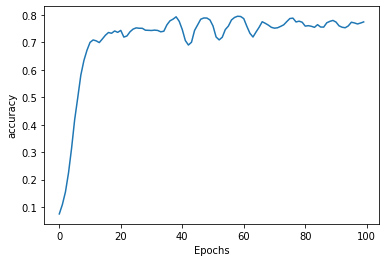

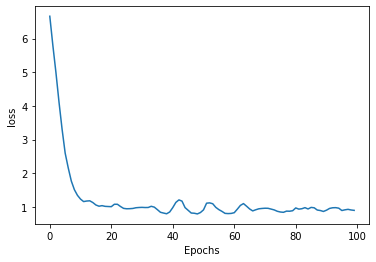

In [46]:
print(history.history.keys())
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [53]:
for word, index in tokenizer.word_index.items():
  print(word)

<OOV>
the
and
i
to
a
of
my
in
me
for
you
all
was
she
that
on
with
her
but
as
when
love
is
your
it
will
from
by
they
be
are
so
he
old
no
oh
ill
at
one
his
there
were
heart
down
now
we
where
young
never
go
come
then
did
not
said
away
their
sweet
them
green
if
take
our
like
night
day
o
out
fair
this
town
have
can
true
its
thou
see
dear
more
theres
or
had
would
over
hear
up
ive
through
home
again
well
oer
land
good
im
ye
sea
left
still
father
long
rose
could
morning
wild
who
eyes
came
while
too
back
little
an
took
him
bow
first
let
man
shall
know
get
high
gone
say
ever
some
mary
hand
till
put
own
time
heard
dead
may
bright
mountain
early
rosin
gave
thee
only
far
maid
must
find
girl
sure
round
dublin
once
world
delight
last
johnny
seen
has
fine
road
mother
tis
what
way
moon
soul
neer
id
just
thats
days
darling
went
white
die
than
hair
goes
meet
today
do
girls
shes
thyme
thy
sing
pretty
new
poor
into
life
irish
give
boy
youre
make
passed
lovely
black
youll
died
red
smile
keep
loves
free
leav

In [52]:
seed_text = "Debasish went to Anusha's house"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
# print(seed_text)
# token_list = tokenizer.texts_to_sequences([seed_text])[0]
# token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
# predicted = model.predict_classes(token_list, verbose=0)
# print(predicted)

IndentationError: ignored

In [48]:
tokenizer.word_index.items()

dict_items([('<OOV>', 1), ('the', 2), ('and', 3), ('i', 4), ('to', 5), ('a', 6), ('of', 7), ('my', 8), ('in', 9), ('me', 10), ('for', 11), ('you', 12), ('all', 13), ('was', 14), ('she', 15), ('that', 16), ('on', 17), ('with', 18), ('her', 19), ('but', 20), ('as', 21), ('when', 22), ('love', 23), ('is', 24), ('your', 25), ('it', 26), ('will', 27), ('from', 28), ('by', 29), ('they', 30), ('be', 31), ('are', 32), ('so', 33), ('he', 34), ('old', 35), ('no', 36), ('oh', 37), ('ill', 38), ('at', 39), ('one', 40), ('his', 41), ('there', 42), ('were', 43), ('heart', 44), ('down', 45), ('now', 46), ('we', 47), ('where', 48), ('young', 49), ('never', 50), ('go', 51), ('come', 52), ('then', 53), ('did', 54), ('not', 55), ('said', 56), ('away', 57), ('their', 58), ('sweet', 59), ('them', 60), ('green', 61), ('if', 62), ('take', 63), ('our', 64), ('like', 65), ('night', 66), ('day', 67), ('o', 68), ('out', 69), ('fair', 70), ('this', 71), ('town', 72), ('have', 73), ('can', 74), ('true', 75), ('its